In [1]:
%matplotlib inline

import cosima_cookbook as cc
import xarray as xr
import numpy as np
import sys, os

from dask.distributed import Client

netcdf_index loaded.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

In [3]:
expt = 'kds75_cp'
n_files = None                          ## For Testing
time_units = 'days since 0001-01-01'   ## These are to give correct dates
offset = None

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/cosima_cookbook/netcdf_index.py:469: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  preprocess=lambda d: decode_time(d[variables], time_units, offset))


KeyboardInterrupt: 

In [14]:
#%time psi = psi.where(mask>0).resample(time='A',skipna=True).mean('time',skipna=True).sum('grid_xt_ocean',skipna=True)*1.0e-9
%time psi_resamp = psi.resample(time='A',skipna=True).mean('time',skipna=True).sum('grid_xt_ocean',skipna=True)*1.0e-9
psi_resamp

CPU times: user 5.42 s, sys: 157 ms, total: 5.57 s
Wall time: 5.56 s


<xarray.DataArray 'ty_trans_rho' (time: 33, potrho: 80, grid_yu_ocean: 2700)>
dask.array<shape=(33, 80, 2700), dtype=float32, chunksize=(1, 8, 270)>
Coordinates:
  * time           (time) datetime64[ns] 1985-12-31 1986-12-31 ... 2017-12-31
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


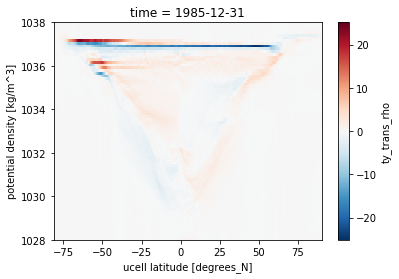

In [15]:
psi_resamp[0,:].plot()

In [ ]:
%time (psi_resamp.cumsum('potrho') -  psi_resamp.sum('potrho')).to_netcdf('AMOC_rho_adv_01deg.nc')

In [9]:
#%time psi_resamp.to_netcdf('psi.nc')

CPU times: user 9min 53s, sys: 3min 47s, total: 13min 40s
Wall time: 6min 50s
